#Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Imports

In [ ]:
# Imports
#import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
plt.style.use('fivethirtyeight')

#Data Dictionary:
Column | Name	| Data | Type | Description | Drug |
Object	Type of drug (drugA, drugB, drugC, drugX, & drugY) (target)

Age -	Int	Age of patient

Sex -	Object	M (male) or F (female)

BP - Object	Blood pressure levels (low, normal, or high)

Cholesterol	- Object	Cholesterol levels (normal or high)

Na_to_K	- Float	Sodium to Potassium ratio in blood

#Creating the Dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#Exploring the Data

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.replace('DrugY', 'drugY', inplace=True)

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.tail(55)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
145,61,M,NORMAL,HIGH,9.443,drugX
146,37,F,LOW,NORMAL,12.006,drugX
147,26,F,HIGH,NORMAL,12.307,drugA
148,61,F,LOW,NORMAL,7.340,drugX
149,22,M,LOW,HIGH,8.151,drugC
150,49,M,HIGH,NORMAL,8.700,drugA
151,68,M,HIGH,HIGH,11.009,drugB
152,55,M,NORMAL,NORMAL,7.261,drugX
153,72,F,LOW,NORMAL,14.642,drugX
154,37,M,LOW,NORMAL,16.724,drugY


In [ ]:
df.head(55)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
df['Drug'].nunique()

5

In [ ]:
df.isnull().value_counts()

Age    Sex    BP     Cholesterol  Na_to_K  Drug 
False  False  False  False        False    False    200
dtype: int64

In [ ]:
#This is to double check to make sure there are no Null values left
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.duplicated() == True

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

# Label Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#categorical data
categorical_cols = ['Sex', 'BP', 'Cholesterol','Drug'] 
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
X = df.loc[:, ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [ ]:
X.shape

(200, 5)

In [ ]:
y.shape

(200,)

In [ ]:
#Splitting into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [ ]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Linear Regress

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True, fit_intercept=True, )
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# print the intercept
print(lin_reg.intercept_)

2.925


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Age,0.052757
Sex,-0.049667
BP,0.658549
Cholesterol,0.135133
Na_to_K,0.908318


In [ ]:
pred = lin_reg.predict(X_test)

In [ ]:
lin_reg.score(X_train,y_train)

0.5751422282613415

In [ ]:
lin_reg.score(X_test,y_test)

0.5672591194358907

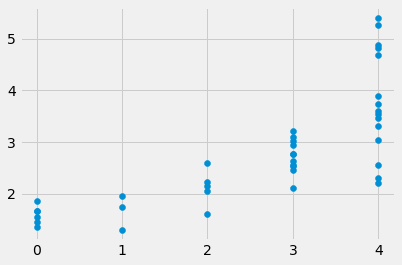

In [ ]:
plt.scatter(y_test, pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


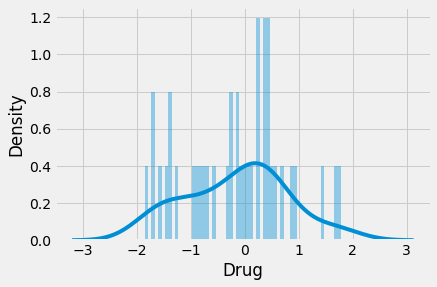

In [ ]:
sns.distplot((y_test - pred), bins=58);

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7476745840192895
MSE: 0.8773821353437314
RMSE: 0.9366867861477131
R2 Square 0.5672591194358907
Train set evaluation:
_____________________________________
MAE: 0.7019831738278622
MSE: 0.7729756084570217
RMSE: 0.8791903141283016
R2 Square 0.5751422282613415


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.747675,0.877382,0.936687,0.567259,0.509614


# Next ro

In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.0479792946452755
MSE: 2.7073166609293438
RMSE: 1.6453925552673878
R2 Square -0.33529798319573056
Train set evaluation:
_____________________________________
MAE: 0.8867025577871332
MSE: 2.0821537082804884
RMSE: 1.4429669810083974
R2 Square -0.1444335050665686


In [ ]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.747675,0.877382,0.936687,0.567259,0.509614
1,Robust Regression,1.047979,2.707317,1.645393,-0.335298,-0.163998


# Ridge regress

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8106670980640274
MSE: 1.1568765615704844
RMSE: 1.075581964134061
R2 Square 0.4294073679060496
Train set evaluation:
_____________________________________
MAE: 0.7513247504419468
MSE: 0.968417120027674
RMSE: 0.9840818665272082
R2 Square 0.46771989280512594


In [ ]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.747675,0.877382,0.936687,0.567259,0.509614
1,Robust Regression,1.047979,2.707317,1.645393,-0.335298,-0.163998
2,Ridge Regression,0.810667,1.156877,1.075582,0.429407,0.510120


# lasso regress

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.779502164593857
MSE: 0.9520906559647054
RMSE: 0.9757513289587185
R2 Square 0.5304115137042142
Train set evaluation:
_____________________________________
MAE: 0.7201727834008138
MSE: 0.8179088689982056
RMSE: 0.9043831428096201
R2 Square 0.5504451424262697


In [ ]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.747675,0.877382,0.936687,0.567259,0.509614
1,Robust Regression,1.047979,2.707317,1.645393,-0.335298,-0.163998
2,Ridge Regression,0.810667,1.156877,1.075582,0.429407,0.510120
3,Lasso Regression,0.779502,0.952091,0.975751,0.530412,0.285220


# Elastic net

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7750614794420263
MSE: 0.942851993458777
RMSE: 0.9710056608788524
R2 Square 0.5349681906491852
Train set evaluation:
_____________________________________
MAE: 0.718032093667339
MSE: 0.813613325937899
RMSE: 0.9020051695738218
R2 Square 0.5528061417036625


In [ ]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.747675,0.877382,0.936687,0.567259,0.509614
1,Robust Regression,1.047979,2.707317,1.645393,-0.335298,-0.163998
2,Ridge Regression,0.810667,1.156877,1.075582,0.429407,0.510120
3,Lasso Regression,0.779502,0.952091,0.975751,0.530412,0.285220
4,Elastic Net Regression,0.775061,0.942852,0.971006,0.534968,0.293492


# Tensor

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=200)

Epoch 1/200
160/160 [==============================] - 1s 3ms/step - loss: 9.9878 - val_loss: 8.4329
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 8.9706 - val_loss: 8.0003
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 8.7771 - val_loss: 7.5178
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 7.6736 - val_loss: 6.9586
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 8.0486 - val_loss: 6.3480
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 7.3240 - val_loss: 5.7039
Epoch 7/200
160/160 [==============================] - 0s 2ms/step - loss: 5.6796 - val_loss: 5.0768
Epoch 8/200
160/160 [==============================] - 0s 2ms/step - loss: 5.7037 - val_loss: 4.5231
Epoch 9/200
160/160 [==============================] - 0s 2ms/step - loss: 5.2509 - val_loss: 4.0905
Epoch 10/200
160/160 [==============================] - 0s 2ms/step - loss: 4.1357 - val_lo

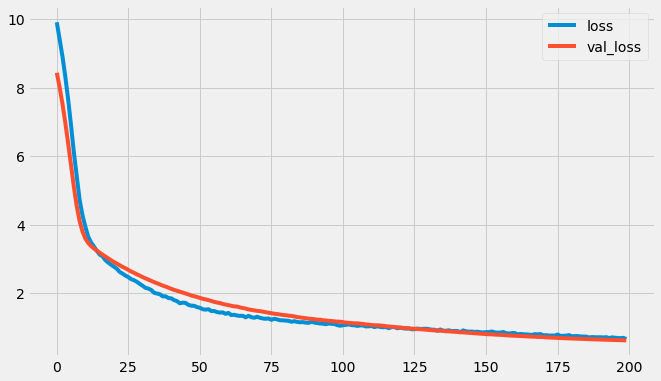

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.5786404252052307
MSE: 0.617020501715096
RMSE: 0.7855065255713004
R2 Square 0.695674228500569
Train set evaluation:
_____________________________________
MAE: 0.5943219192326069
MSE: 0.6619671087435062
RMSE: 0.8136136114541755
R2 Square 0.63615686225022


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.747675,0.877382,0.936687,0.567259,0.509614
1,Robust Regression,1.047979,2.707317,1.645393,-0.335298,-0.163998
2,Ridge Regression,0.810667,1.156877,1.075582,0.429407,0.510120
3,Lasso Regression,0.779502,0.952091,0.975751,0.530412,0.285220
4,Elastic Net Regression,0.775061,0.942852,0.971006,0.534968,0.293492
5,Artficial Neural Network,0.578640,0.617021,0.785507,0.695674,0.000000


# Model Compared

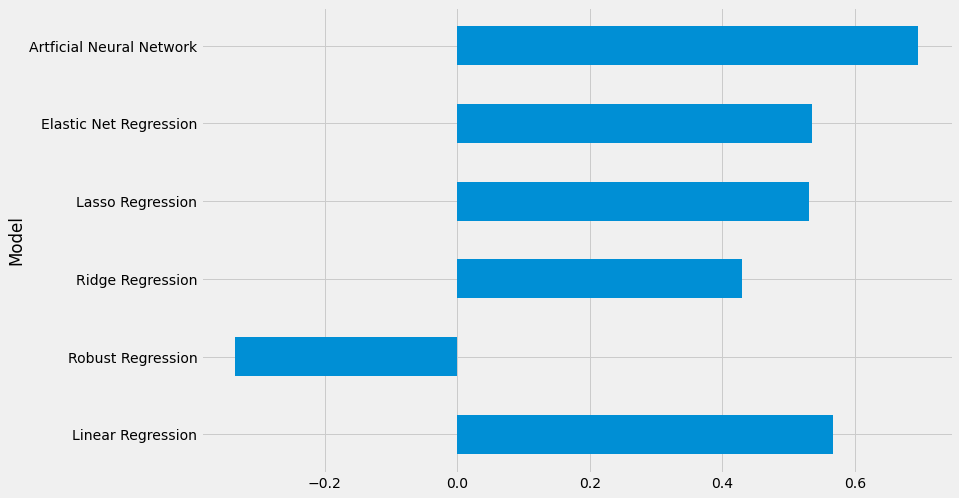

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Bagged Tree

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
# Bagged Tree
bt = BaggingClassifier()
bt.fit(X_train, y_train)

print('Training accuracy:', bt.score(X_train, y_train))
print('Test accuracy:', bt.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


# One vs One Class

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
log_reg = LogisticRegression()
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)

print('Training accuracy:', ovo.score(X_train, y_train))
print('Test accuracy:', ovo.score(X_test, y_test))

Training accuracy: 0.9625
Test accuracy: 0.975


In [ ]:
y_preds = ovo.predict(X)
print("Root Mean Square Error is:\n")
np.sqrt(mean_squared_error(y, y_preds))

Root Mean Square Error is:



1.6792855623746665

# Random Forest Class

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [ ]:
y_preds = rf.predict(X)
print("Root Mean Square Error is:\n")
np.sqrt(mean_squared_error(y, y_preds))

Root Mean Square Error is:



1.7748239349298849

Feature: 0, Score: 0.14101
Feature: 1, Score: 0.01152
Feature: 2, Score: 0.24996
Feature: 3, Score: 0.05443
Feature: 4, Score: 0.54308


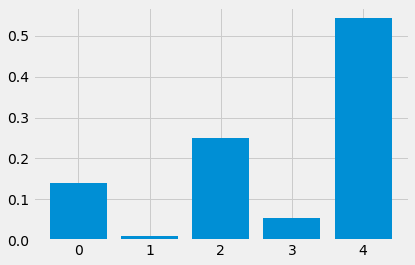

In [ ]:
from matplotlib import pyplot
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Logistic Regression

In [ ]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 88.33%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_preds = model.predict(X)
print("Root Mean Square Error is:\n")
np.sqrt(mean_squared_error(y, y_preds))

Root Mean Square Error is:



0.7071067811865476

# Validating

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

# KFOLD

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Accuracy: 85.00%


# Stratified K-fold Cross-Validation

In [ ]:
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
#85%

Accuracy: 85.50%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

# Repeated Random Test-Train Split

In [ ]:
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LogisticRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))
#87%

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 87.17% (4.02%)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# Conclusion:

I've decided that overall I prefer Logistic Regression model because I feel that the scores are very close to one another and makes me feel comfortable with the accuracy of the model. Also the RMSE is 0.7 with a score of 88.33%. Many of my models have between 80-90% but overall the RMSE is much larger than the Logistic Regression RMSE. So with that being said I believe the Logistic Regression model is the best model for this dataset.